# CRISP DM

In [ ]:
Bussines Understanding

- Problem
Dataset ini berisi kumpulan catatan pasien dari percobaan pada tahun 1984-1989 yang dilakukan
oleh Kelompok Studi Kanker Payudara Jerman (GBSG) dari 720 pasien dengan kanker payudara nodus positif.
Nodus merupakan sel kanker menyebar melalui sistem limfatik dan darah, dan dapat menyebabkan
adanya benjolan kanker pada kelenjar getah bening. 

- Tujuan
Model ini dibuat bertujuan untuk menganalisis dan memprediksi pasien apakah pasien tersebut
didiagnosa sembuh total atau akan kambuh kembali bahkan hingga meninggal, dengan data-data
yang ada di dalam dataset ini.

In [ ]:
Data Understanding

1. pid : ID Pasien
2. age : Usia Pasien
3. meno : Status Menopause (Menopause adalah berakhirnya siklus menstruasi secara alami yang
                            biasanya terjadi saat wanita memasuki usia 45–55 tahun)
4. size : Ukuran Tumor
5. grade : Tingkat Tumor
6. nodes : Jumlah Kelenjar Getah Bening
7. pgr : Reseptor Progesteron
8. er : Reseptor Estrogen
9. hormon : Terapi Hormon
10. rfstime : Jumlah Hari Dari Sehat ke Pertama Kambuh
11. status : Apakah pasien sembuh total atau kambuh hingga meninggal

Reseptor adalah protein di dalam atau di sel yang dapat menempel pada zat tertentu di dalam darah.
Sel payudara normal dan beberapa sel kanker payudara memiliki reseptor yang menempel pada hormon
estrogen dan progesteron, dan membutuhkan hormon tersebut untuk pertumbuhan sel.

In [ ]:
Data Preparation

Yang menjadi fitur yaitu: 

1. pid
2. age
3. meno
4. size
5. grade
6. nodes
7. pgr
8. er
9. hormon
10. rfstime        

Yang menjadi target adalah status

In [ ]:
Modeling

Model yang digunakan adalah K-NearestNeighbor atau KNN

In [ ]:
Evaluation

Evaluasi merupakan tahap validasi model yang dibentuk berdasarkan parameter-parameter yang relevan.
Parameter tersebut bisa berupa Parameter statistik, Parameter ekonomi dan lain-lain.

In [ ]:
Deployment

Deployment dilakukan dengan menggunakan GitHub sebagai tempat menyimpan source code yang telah
dibuat dan Streamlit Share untuk mengaplikasikan source code yang telah diunggah di GitHub

# Import library

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("gbsg.csv")

In [30]:
df.head()

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,18,2,2,0,0,0,1838,0
1,2,1575,55,1,20,3,16,0,0,0,403,1
2,3,1140,56,1,40,3,3,0,0,0,1603,0
3,4,769,45,0,25,3,1,0,4,0,177,0
4,5,130,65,1,30,2,5,0,36,1,1855,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  686 non-null    int64
 1   pid         686 non-null    int64
 2   age         686 non-null    int64
 3   meno        686 non-null    int64
 4   size        686 non-null    int64
 5   grade       686 non-null    int64
 6   nodes       686 non-null    int64
 7   pgr         686 non-null    int64
 8   er          686 non-null    int64
 9   hormon      686 non-null    int64
 10  rfstime     686 non-null    int64
 11  status      686 non-null    int64
dtypes: int64(12)
memory usage: 64.4 KB


In [33]:
df['status'].value_counts()

status
0    387
1    299
Name: count, dtype: int64

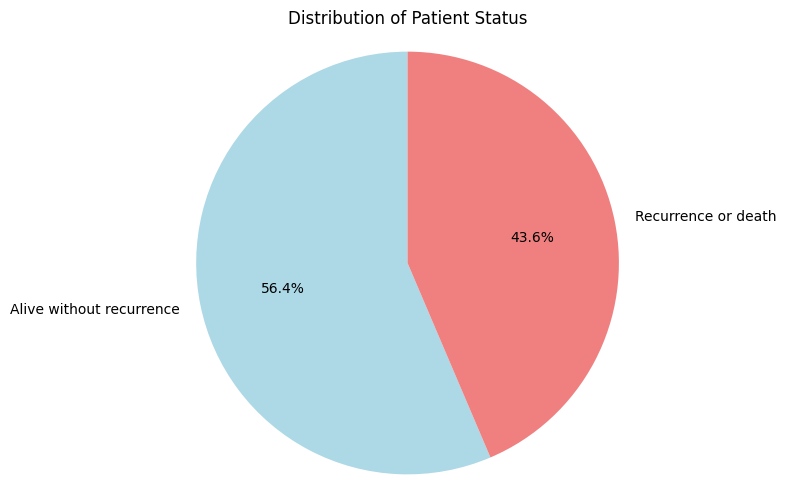

In [34]:
plt.figure(figsize=(6, 6))
status_counts = df['status'].value_counts()
labels = ['Alive without recurrence', 'Recurrence or death']
plt.pie(status_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Patient Status')
plt.axis('equal')
plt.show()

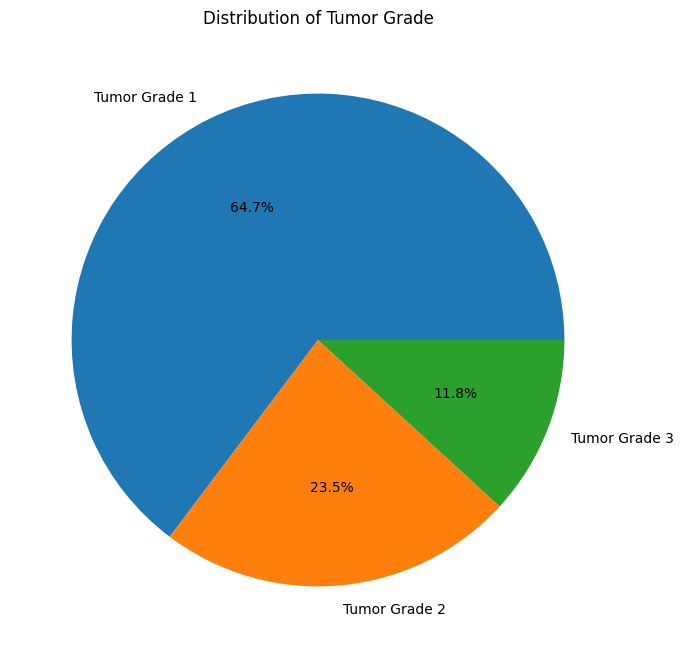

In [50]:
plt.figure(figsize=(8,8))
df_grade=df['grade'].value_counts()
labels = ['Tumor Grade 1', 'Tumor Grade 2','Tumor Grade 3']
plt.pie(df_grade, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Tumor Grade')
plt.show()

# Split data

In [35]:
X = df.drop(columns=['status', 'Unnamed: 0'], axis=1)
Y = df['status']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [37]:
print(X.shape, x_train.shape, x_test.shape)

(686, 10) (548, 10) (138, 10)


# Membuat model training

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

In [39]:
model = knn.fit(x_train, y_train)

# Evaluasi model

In [40]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [41]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.8266423357664233


In [42]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [43]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.7898550724637681


# Model Prediksi

In [47]:
input_data = (1140, 56, 1, 40, 3, 3, 0, 0, 0, 1603)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
prediksi_wine = model.predict(data_reshaped)
print(prediksi_wine)

if (prediksi_wine[0] == 0):
    print('Sembuh Total Tanpa Kambuh')
else:
    print('Kambuh Atau Meninggal')

[0]
Sembuh Total Tanpa Kambuh


C:\Users\zaiim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Save Model

In [51]:
import pickle

filename = 'kanker_payudara.sav'
pickle.dump(model, open(filename, 'wb'))